# **Linear Regression**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

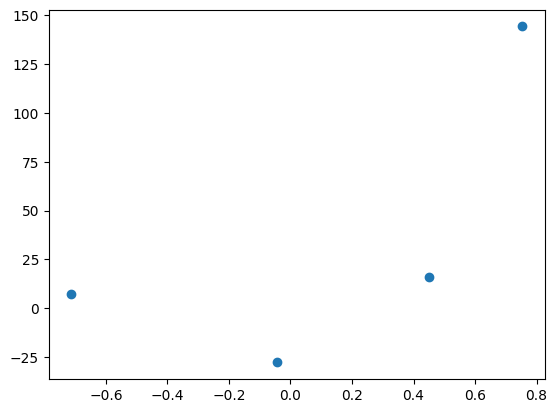

In [4]:
plt.scatter(X, y)
plt.show()

**OLS**

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [6]:
print(lr.coef_)
print(lr.intercept_)

[78.35063668]
26.15963284313262


# **Manual update using OLS**

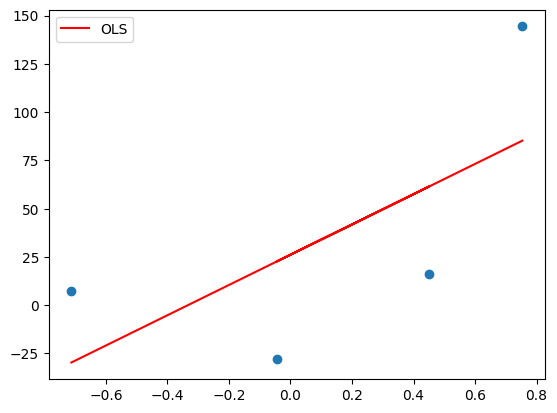

In [7]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red',label='OLS')
plt.legend()
plt.show()

In [8]:
m = 78.35
b = 0

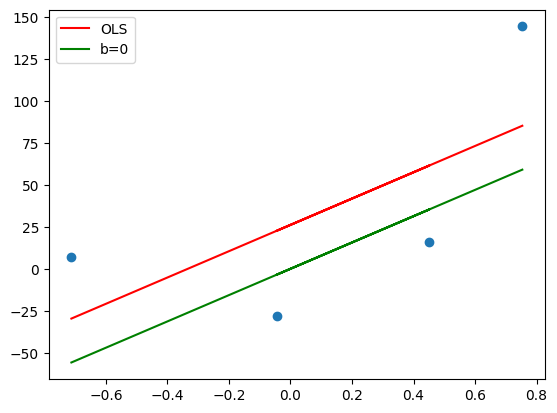

In [9]:
y_pred = ((m * X) + b).reshape(4)

plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red',label='OLS')
plt.plot(X, y_pred, color='green',label='b={}'.format(b))
plt.legend()
plt.show()

In [10]:
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
lRate=0.1
step_size = lRate * loss_slope
b1 = b - step_size

print(loss_slope)
print(step_size)
print(b1)

-209.27763408209216
-20.927763408209216
20.927763408209216


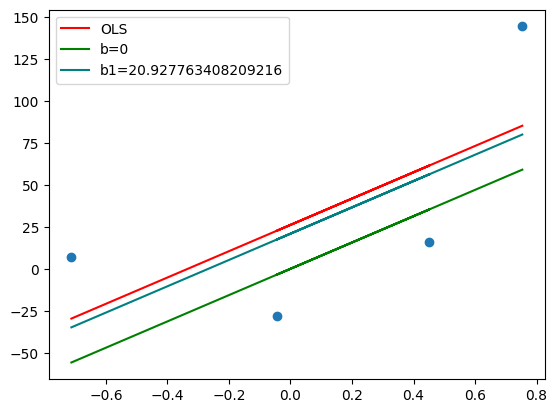

In [11]:
y_pred1 = ((m * X) + b1).reshape(4)

plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red',label='OLS')
plt.plot(X, y_pred, color='green',label='b={}'.format(b))
plt.plot(X, y_pred1, color='teal',label='b1={}'.format(b1))
plt.legend()
plt.show()

In [12]:
loss_slope = -2 * np.sum(y - m * X.ravel() - b1)
lRate=0.1
step_size = lRate * loss_slope
b2 = b1 - step_size

print(loss_slope)
print(step_size)
print(b2)

-41.85552681641843
-4.185552681641844
25.11331608985106


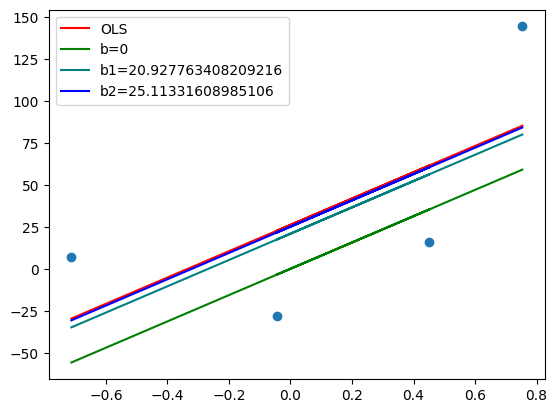

In [13]:
y_pred2 = ((m * X) + b2).reshape(4)

plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red',label='OLS')
plt.plot(X, y_pred, color='green',label='b={}'.format(b))
plt.plot(X, y_pred1, color='teal',label='b1={}'.format(b1))
plt.plot(X, y_pred2, color='blue',label='b2={}'.format(b2))
plt.legend()
plt.show()

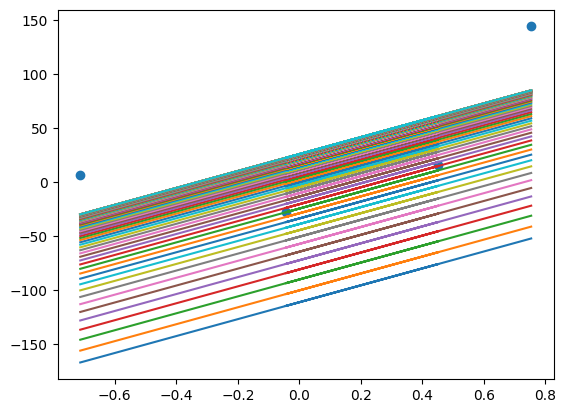

In [14]:
m = 78.35
b = -123
lRate=0.01
epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m * X.ravel() - b)
  step_size = lRate * loss_slope
  b = b - step_size

  y_pred = ((m * X) + b).reshape(4)
  plt.plot(X, y_pred)

plt.scatter(X, y)
plt.show()

# **Linear Regression**

In [15]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

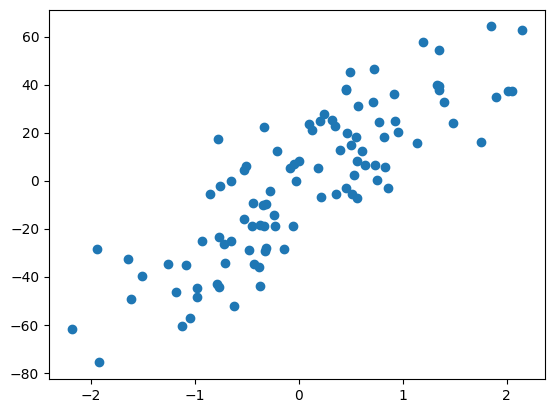

In [16]:
plt.scatter(X, y)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [18]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


# **My Class for "b"**

In [19]:
class MyGD:
  def __init__(self, lRate, epochs):
    self.m = 27.82
    self.b = 120
    self.lRate = lRate
    self.epochs = epochs

  def fit(self, X, y):
    for i in range(self.epochs):
      loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)
      step_size = self.lRate * loss_slope
      self.b = self.b - step_size

      plt.plot(i, self.b, 'ro')

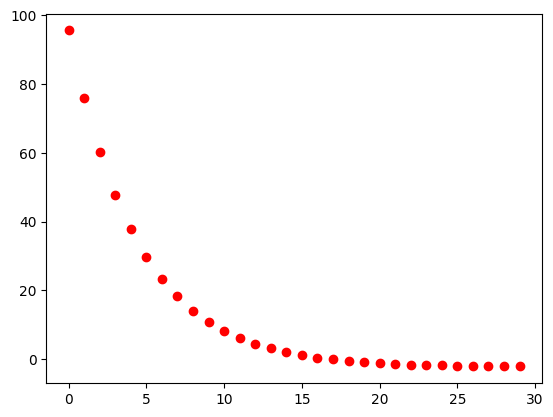

In [20]:
gd = MyGD(0.001, 30)
gd.fit(X, y)

# **Linear Regression**

In [21]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

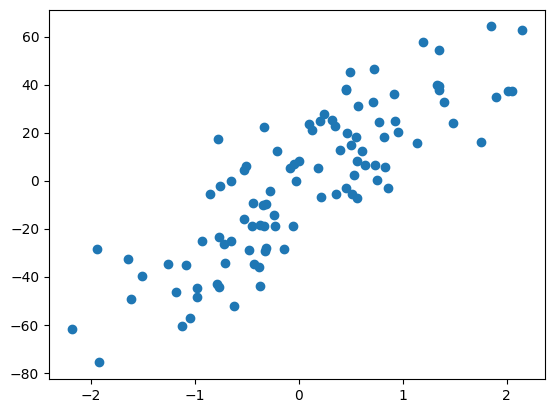

In [22]:
plt.scatter(X, y)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [26]:
y_pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6345158782661012

# **My Class for "b" & "m"**

In [28]:
class MyGD:
  def __init__(self, lRate, epochs):
    self.m = 100
    self.b = 120
    self.lRate = lRate
    self.epochs = epochs

  def fit(self, X, y):
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
      step_size_b = self.lRate * loss_slope_b
      self.b = self.b - step_size_b

      loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
      step_size_m = self.lRate * loss_slope_m
      self.m  = self.m - step_size_m

      plt.plot(i, self.b, 'ro')
      plt.plot(i, self.m, 'ro')

    print(self.m)
    print(self.b)

  def predict(self, X):
    return self.m * X + self.b

27.98256372053656
-2.193450077031579


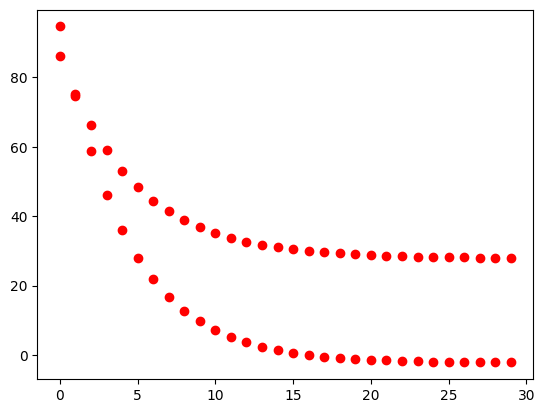

In [29]:
gd = MyGD(0.001, 30)
gd.fit(X, y)

In [30]:
y_pred = gd.predict(X_test)
r2_score(y_test, y_pred)

0.6350788996365563